# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [52]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

In [6]:
d = hospital_read_df

In [7]:
d.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


In [9]:
d.shape

(16860, 12)

In [8]:
d.describe()

,Provider Number,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,16860.000000,3129.000000,13731.000000,13731.000000,13731.000000,11497.000000
mean,263516.943654,2.905401,1.002582,16.916532,16.866135,63.633731
std,160146.191702,2.074384,0.091088,6.197542,5.989652,59.540296
min,10001.000000,1.000000,0.549500,2.700000,2.900000,11.000000
25%,110181.500000,1.000000,0.949500,15.200000,15.800000,24.000000
50%,250157.000000,1.000000,0.997100,18.500000,18.500000,45.000000
75%,390138.250000,5.000000,1.052350,21.100000,21.100000,82.000000
max,670091.000000,7.000000,1.909500,32.800000,29.400000,879.000000


In [12]:
d.dtypes

Hospital Name                  object
Provider Number                 int64
State                          object
Measure Name                   object
Number of Discharges           object
Footnote                      float64
Excess Readmission Ratio      float64
Predicted Readmission Rate    float64
Expected Readmission Rate     float64
Number of Readmissions        float64
Start Date                     object
End Date                       object
dtype: object

In [38]:
test =d['Number of Discharges'].value_counts

In [32]:
print(test)

<bound method IndexOpsMixin.value_counts of 0                  242
1                  247
2                  586
3                  965
4                  149
             ...      
16855    Not Available
16856    Not Available
16857                0
16858    Not Available
16859    Not Available
Name: Number of Discharges, Length: 16860, dtype: object>


****
## Preliminary Analysis

In [13]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


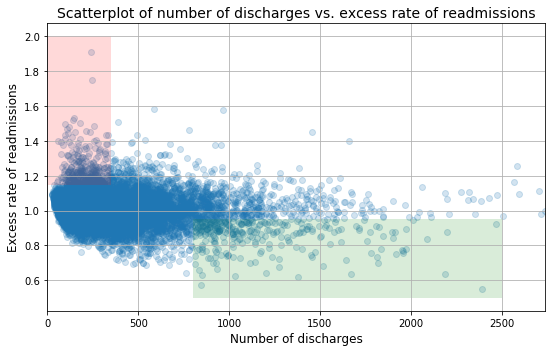

In [14]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

I don't see this analysis as statistically sound because of the following

DATA CLEANING

(2) Before removing missing values for "Number of Discharges" the analysis did not see if removing them will create any biases.

EDA 
(3) The relationship between discharge numbers and readmission rates were largely speculation. The scatter plot does not show any sound relationships

STATISTICAL INFERENCE

(2) The statistics presented were without significance tests. Therefore, it was unclear whether the observed differenes reflect true differences or purely by chance.

IN SUMMARY

(3) Statements in conclusions were totally unfounded. Signficance were claimed without statistical support

(4) Showed no test for correlation or hypothesis testing
(5) Didn't report statistical significance 

(6) Relationship of hospital capacity to discharges seems irrelevant  



*** Conduct a statistically sound analysis and make recommendations ***

In [ ]:
#renaming the dataset to d

In [39]:
# finding which columns have null values 
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 12 columns):
Hospital Name                 16860 non-null object
Provider Number               16860 non-null int64
State                         16860 non-null object
Measure Name                  16860 non-null object
Number of Discharges          16860 non-null object
Footnote                      3129 non-null float64
Excess Readmission Ratio      13731 non-null float64
Predicted Readmission Rate    13731 non-null float64
Expected Readmission Rate     13731 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    16860 non-null object
End Date                      16860 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 1.5+ MB


In [40]:
df = d

In [41]:
# Drop irrelevant columns
df = df[['Number of Discharges', 'Excess Readmission Ratio']]

# Drop rows that are missing Discharge information 
df = df[df['Number of Discharges'] != 'Not Available']
df['Number of Discharges'] = pd.to_numeric(df['Number of Discharges'])

# Drop nulls 
df.dropna(axis=0, how='any', subset=['Excess Readmission Ratio'], inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11497 entries, 0 to 13730
Data columns (total 2 columns):
Number of Discharges        11497 non-null int64
Excess Readmission Ratio    11497 non-null float64
dtypes: float64(1), int64(1)
memory usage: 269.5 KB


In [ ]:
_ = plt.hist(df['Number of Discharges'], bins = 20)

In [50]:
df2 = df[df['Number of Discharges']<3000]

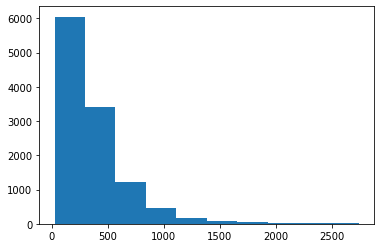

In [53]:
_ = plt.hist(df2['Number of Discharges'])


Test 1:
Null hypothesis: Excess readmission ratios are not correlated with the numbers of discharges.
Alternate hypothesis: Excess readmission ratios are correlated with the numbers of discharges.

In [ ]:
#EDA building scatter plot between discharges and readmission ratio

In [57]:
import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")



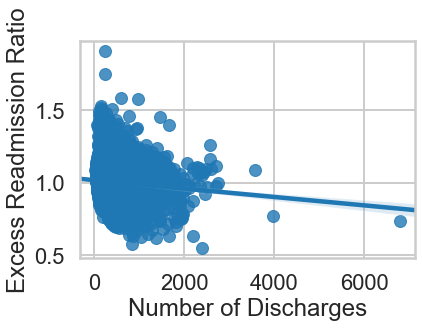

In [59]:
sns.regplot(x='Number of Discharges',y='Excess Readmission Ratio', data=df, fit_reg = True)

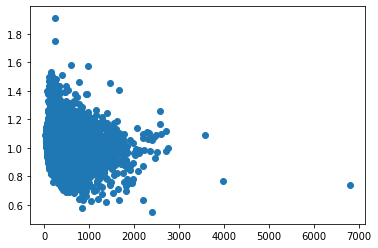

In [56]:
_ = plt.scatter(df['Number of Discharges'],df['Excess Readmission Ratio'])
plt.xlabel =

on visual inspection - they do look slightly related. Checking p value for pearson correlation coefficient

In [61]:
alpha = 0.01
x = df['Number of Discharges']
y = df['Excess Readmission Ratio']

from scipy import stats
r, p = stats.pearsonr(x, y)
print('Pearson correlation coefficient = {}'.format(r))
print('p = {}'.format(p))
if p < alpha:
    print ('Null hypothesis rejected, two variables are correlated.')
else:
    print ('Null hypothesis not rejected, two variables are not correlated.')

Pearson correlation coefficient = -0.09739794351079353
p = 1.2225473776779417e-25
Null hypothesis rejected, two variables are correlated.


the test above indicates that discharges and readmission ratio are correlated

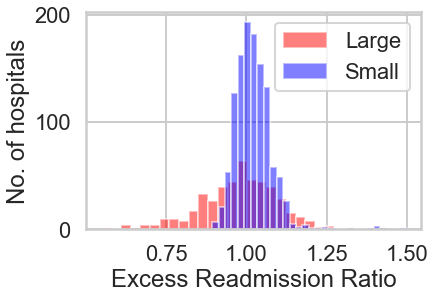

In [62]:
large = df.loc[df['Number of Discharges']>1000, 'Excess Readmission Ratio']
small = df.loc[df['Number of Discharges']<100, 'Excess Readmission Ratio']
#Take a quick look
_ = plt.hist(large, color = 'red', bins = 30, alpha = 0.5)
_ = plt.hist(small, color = 'blue', bins = 30, alpha = 0.5)
_ = plt.legend(['Large', 'Small'])
_ = plt.xlabel('Excess Readmission Ratio')
_ = plt.ylabel('No. of hospitals')

In [63]:
#Take a two samle t test
t, p = stats.ttest_ind(large, small)
print('p = {}'.format(p))
if p < alpha:
    print('Null hypothesis rejected, the excess readimission ratios of large and small hospitals are different.')
else:
    print('Null hypothesis not rejected, the excess readimission ratios of large and small hospitals are the same.')

p = 3.778753923341558e-23
Null hypothesis rejected, the excess readimission ratios of large and small hospitals are different.


In [64]:
print(large.mean())

0.9783354211663071


In [65]:
print(small.mean())

1.0226183501683486


Even though the small and large hospitals have slightly different redmission rate which is statistically significant but in practicality it is not so much of a differnece